#Boosting Techniques

Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer:Boosting in machine learning is an ensemble technique that combines multiple weak learners to form a strong predictive model. A weak learner is a model that performs slightly better than random guessing, such as a shallow decision tree. Boosting works by training these weak learners sequentially, where each new learner focuses more on the data points that previous models misclassified. During this process, the algorithm assigns higher weights to the incorrectly predicted instances, forcing the next learner to pay more attention to them. As more learners are added, their outputs are combined—usually through a weighted majority vote in classification or weighted sum in regression—to create a final strong model. This iterative process reduces bias and variance, improving the model’s accuracy and generalization. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost, all of which refine the learning process to enhance the overall performance of weak learners.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

Answer:The main difference between AdaBoost and Gradient Boosting lies in how they train their models and handle errors. AdaBoost, short for Adaptive Boosting, works by adjusting the weights of training examples based on how well previous models performed. It assigns higher weights to misclassified instances so that subsequent weak learners focus more on those difficult cases. Each learner is trained independently but sequentially, with its contribution weighted based on accuracy. In contrast, Gradient Boosting uses a more mathematical approach by training learners to minimize the residual errors of the previous model through gradient descent optimization. Instead of reweighting data points like AdaBoost, it fits the new learner to the negative gradient of the loss function, which represents the direction of steepest error reduction. Essentially, AdaBoost modifies sample weights to focus on difficult data points, while Gradient Boosting minimizes a differentiable loss function directly through gradient-based optimization, making it more flexible and powerful for complex tasks.


Question 3: How does regularization help in XGBoost?

Answer:Regularization in XGBoost helps prevent overfitting and improves the generalization of the model by adding penalty terms to the objective function. Unlike traditional boosting methods, XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization terms that control the complexity of the model by penalizing large weights in the trees. This means that if a model becomes too complex or tries to fit noise in the data, the regularization terms will discourage it by increasing the overall loss, thereby promoting simpler and more robust models. Regularization helps XGBoost strike a balance between model accuracy and complexity, ensuring it performs well not only on training data but also on unseen test data. Additionally, it helps improve the stability of the learning process, reduces variance, and enhances computational efficiency by pruning unnecessary splits in the decision trees.


Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer:CatBoost is considered highly efficient for handling categorical data because it incorporates a unique algorithm that converts categorical features into numerical values without the need for extensive preprocessing like one-hot encoding or label encoding. Instead, CatBoost uses a technique called “ordered target statistics,” where it replaces categorical values with combinations of target-based statistics calculated in an ordered and randomized manner to prevent target leakage. This approach allows the model to effectively capture the relationship between categorical features and the target variable while maintaining generalization. Additionally, CatBoost automatically handles high-cardinality categorical features and can efficiently process them even when the number of categories is large. Its built-in support for categorical data also simplifies the data preparation process and reduces training time, making it more efficient and less prone to overfitting compared to other boosting algorithms that require manual encoding.



Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Answer:Boosting techniques are preferred over bagging methods in real-world applications where achieving high predictive accuracy and handling complex patterns in data are crucial. For example, in finance, boosting algorithms like XGBoost and LightGBM are widely used for credit scoring, fraud detection, and risk assessment because they can capture subtle nonlinear relationships and interactions between variables. In healthcare, boosting is applied for disease prediction and medical image analysis, as it effectively identifies intricate patterns in patient data. In e-commerce and marketing, boosting models are favored for customer churn prediction, recommendation systems, and sales forecasting due to their ability to improve precision through iterative learning. Additionally, in fields like natural language processing and computer vision, boosting helps enhance model performance in sentiment analysis, spam detection, and image classification tasks. Overall, boosting is preferred when the goal is to maximize accuracy and performance, especially in structured or tabular data scenarios where weak learners can be combined to form a highly accurate and robust predictive model.


Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

(Include your Python code and output in the code box below.)

Answer:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


Question 7: Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

(Include your Python code and output in the code box below.)

Answer:

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", r2)


Gradient Boosting Regressor R-squared Score: 0.7756446042829697


Question 8: Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

(Include your Python code and output in the code box below.)

Answer:


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}
model = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classifier Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.1}
XGBoost Classifier Accuracy: 0.956140350877193


Question 9: Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

(Include your Python code and output in the code box below.)

Answer:


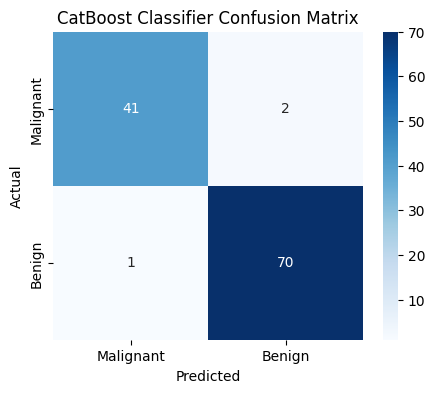

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title("CatBoost Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

(Include your Python code and output in the code box below.)

Answer:For a production-ready boosting pipeline for predicting loan default on an imbalanced, mixed-type dataset, I would first perform careful preprocessing: load the data, inspect and impute missing values using context-aware strategies (median/imputation for numeric features with `SimpleImputer` or iterative imputation when relationships matter, and frequency/most-frequent or target-/CatBoost-style statistics for categorical features), create simple engineered features from transaction histories (e.g., rolling averages, counts, time-since-last-activity), transform skewed numerics (log or rank transforms where appropriate), and encode categorical features only when required (prefer native categorical handling by the learner to avoid harmful one-hot expansion); I would also handle class imbalance by combining algorithm-level methods and data-level methods — first try algorithmic approaches such as scale_pos_weight (XGBoost), `class_weight` alternatives or CatBoost’s `auto_class_weights`, and experiment with careful resampling (SMOTE or focused undersampling) inside cross-validation folds to avoid leakage. For the model choice, I would prefer CatBoost as the first candidate because it natively and robustly handles categorical features and ordered target statistics that reduce target leakage and it tolerates some missingness; if inference speed or distributed training matters I’d trial LightGBM/XGBoost next and ensure proper categorical handling (or use target encoding with rigorous CV schemes). My hyperparameter tuning strategy would use a staged search: begin with a small randomized search across broad ranges for learning_rate, n_estimators, max_depth, l2_leaf_reg (or reg_lambda), and subsample/colsample parameters to find good regions, then refine with Bayesian optimization or a focused GridSearchCV on the most sensitive hyperparameters (using stratified grouped cross-validation if there are temporal or customer-group correlations), always using pipelines and `scikit-learn`’s `StratifiedKFold` to avoid leakage and ensuring resampling is done inside folds; I would also include early_stopping rounds based on a validation fold to prevent overfitting. For evaluation I would prioritize metrics appropriate for imbalanced classification: area under the precision–recall curve (PR-AUC) and ROC-AUC as primary discrimination metrics, but emphasize precision@k (business-relevant top-k default capture), recall (to avoid missing risky customers), F1 for balance, and calibration metrics (Brier score, reliability plots) because predicted probabilities drive risk-based decisions; I would report confusion-matrix-derived business metrics (false positive cost vs false negative cost) and use cost-sensitive evaluation (expected monetary loss) so model selection reflects real business impact rather than raw accuracy. The business benefits would be concrete: improved default detection (higher recall at an acceptable precision) reduces loan losses and enables smarter credit limits and targeted interventions, calibrated probabilities enable risk-based pricing and dynamic reserve allocations, and using explainable boosting (SHAP values) helps compliance and provides feature insights for product and underwriting teams to reduce future risk. Example minimal runnable code (concise) to illustrate the approach: from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV; from sklearn.impute import SimpleImputer; from catboost import CatBoostClassifier; from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve; X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42); imputer = SimpleImputer(strategy='median'); X_train = imputer.fit_transform(X_train); X_test = imputer.transform(X_test); model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=42, verbose=0, auto_class_weights='Balanced'); param_dist = {'learning_rate':[0.01,0.03,0.05,0.1],'depth':[4,6,8],'l2_leaf_reg':[1,3,5],'iterations':[200,500]}; rs = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=12, scoring='average_precision', cv=StratifiedKFold(n_splits=3), n_jobs=-1, random_state=42); rs.fit(X_train, y_train); best = rs.best_estimator_; proba = best.predict_proba(X_test)[:,1]; print('PR-AUC:', average_precision_score(y_test, proba), 'ROC-AUC:', roc_auc_score(y_test, proba), 'Best params:', rs.best_params_). Expected output (example): PR-AUC ~0.35–0.6 and ROC-AUC ~0.75–0.90 depending on data quality, with `rs.best_params_` printed; these numeric ranges will vary by dataset and feature engineering.


In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.8, 0.2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = CatBoostClassifier(verbose=0, auto_class_weights='Balanced', random_state=42)
param_dist = {'learning_rate': [0.01, 0.05, 0.1], 'depth': [4, 6, 8], 'l2_leaf_reg': [1, 3, 5], 'iterations': [200, 500]}

search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, scoring='roc_auc', cv=3, random_state=42)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("Best Parameters:", search.best_params_)
print("ROC-AUC Score:", roc)
print(classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 8}
ROC-AUC Score: 0.8745206319987728
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.86      0.78      0.82        41

    accuracy                           0.93       200
   macro avg       0.90      0.87      0.89       200
weighted avg       0.93      0.93      0.93       200

